# Assignment 04 - Feb 5th, 2018

In this notebook, hypotheses for the price of automobiles are tested and results are presented. 

### Load & Clean Data

In [14]:
getwd()
# Change the working directory 
setwd("/Users/duygusonmez/Desktop/DataScience410/Lecture1/")

# Read the csv file
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, 
                      stringsAsFactors = FALSE)

  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)

  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}
auto.price = read.auto()
str(auto.price)

[1] "/Users/duygusonmez/Desktop/DataScience410/Lecture1"

Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”

'data.frame':	195 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.o

### Normalize Pricing Values

Get everything ranged from zero to one.

In [15]:
prices = auto.price$price
prices.log = log(auto.price$price)

normit = function(x){(x-min(x))/(max(x)-min(x))}

prices.norm = normit(prices)
prices.log.norm = normit(prices.log)

head(prices.norm)
head(prices.log.norm)

[1] 0.2079589 0.2825580 0.2825580 0.2192543 0.3061417 0.2515267

[1] 0.4441902 0.5362948 0.5362948 0.4593822 0.5619411 0.5002023

### 1. Compare and Test Normality: A Graphical Approach 

First, paired Q-Q plotting was performed. 

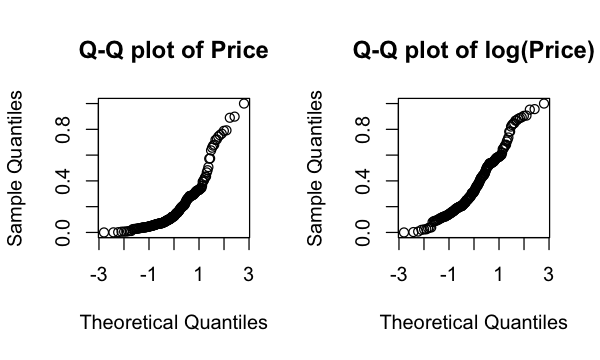

In [16]:
options(repr.plot.width=5, repr.plot.height=3)

# Visual test of normality
par(mfrow = c(1, 2))
qqnorm(prices.norm, main = 'Q-Q plot of Price')
qqnorm(prices.log.norm, main = 'Q-Q plot of log(Price)')
par(mfrow = c(1, 1))

Since the points don't fall on a straight line, price and log price don't have a scheme of normal distribution. Now, we'll take a closer look below and see if we can see a different pattern.

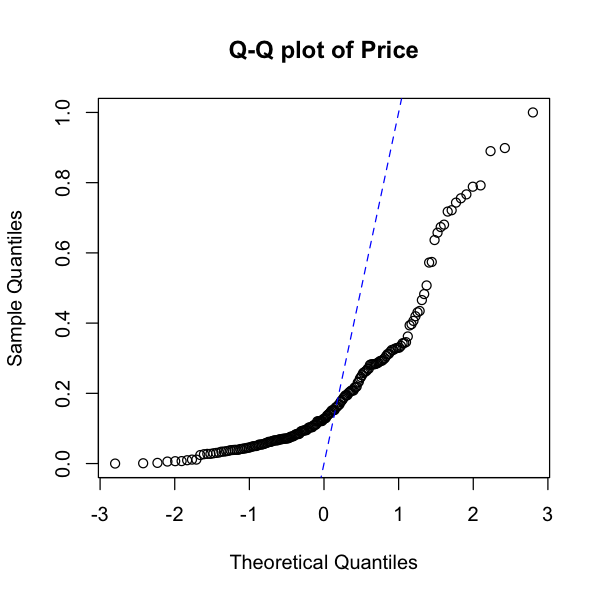

In [17]:
options(repr.plot.width=5, repr.plot.height=5)

# Visual test of normality
qqnorm(prices.norm, main = 'Q-Q plot of Price')
abline(a = 0.0, b = 1.0, lty = 2, col = 'red')

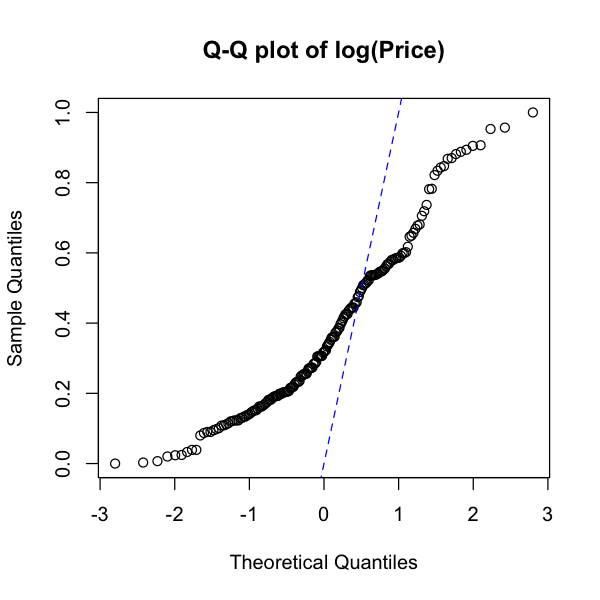

In [18]:
options(repr.plot.width=5, repr.plot.height=5)

# Visual test of normality
qqnorm(prices.log.norm, main = 'Q-Q plot of log(Price)')
abline(a = 0.0, b = 1.0, lty = 2, col = 'blue')

As you can see, log(Price) falls into normal distribution line for a limited patch between 04. and 0.6 whereas regular Price doesn't come close.

### Compare and test Normality: Formal tests through K-S Statistics

In [20]:
normal.dist = rnorm(250) ## Our standard Normal for comparison.
ks.test(prices.norm, normal.dist, alternative = "two.sided") 
ks.test(prices.log.norm, normal.dist, alternative = "two.sided")

Warning message in ks.test(prices.norm, normal.dist, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  prices.norm and normal.dist
D = 0.544, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test(prices.log.norm, normal.dist, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  prices.log.norm and normal.dist
D = 0.544, p-value < 2.2e-16
alternative hypothesis: two-sided


Since the p values for both Price and log(Price) are much lower than 0.5, we have to reject null hypothesis that claims the normality of those distributions.

### 2. Testing Significance of log(Price) based on fuel, aspiration and rear vs. front wheel drive

#### Significance by fuel type 

Start with observing data based on fuel type. 

In [21]:
table(auto.price$fuel.type)


diesel    gas 
    20    175 

In [24]:
autos.gas <- auto.price[auto.price$fuel.type == 'gas',]
autos.diesel <- auto.price[auto.price$fuel.type == 'diesel',]
autos.gas.log.prices <- log(autos.gas$price)
autos.diesel.log.prices <- log(autos.diesel$price)

Histograms of price and log price data were plotted as below.

In [22]:
# Set the plot area
plot.t <- function(a, b, cols = c('pop_A', 'pop_B'), nbins = 20){
  maxs = max(c(max(a), max(b)))
  mins = min(c(min(a), min(b)))
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  par(mfrow = c(2, 1))
  hist(a, breaks = breaks, main = paste('Histogram of', cols[1]), xlab = cols[1])
  abline(v = mean(a), lwd = 4, col = 'red')
  hist(b, breaks = breaks, main = paste('Histogram of', cols[2]), xlab = cols[2])
  abline(v = mean(b), lwd = 4, col = 'red')
  par(mfrow = c(1, 1))
}


	Welch Two Sample t-test

data:  autos.gas.log.prices and autos.diesel.log.prices
t = -2.0019, df = 23.942, p-value = 0.05675
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.470292829  0.007204235
sample estimates:
mean of x mean of y 
 9.325876  9.557420 


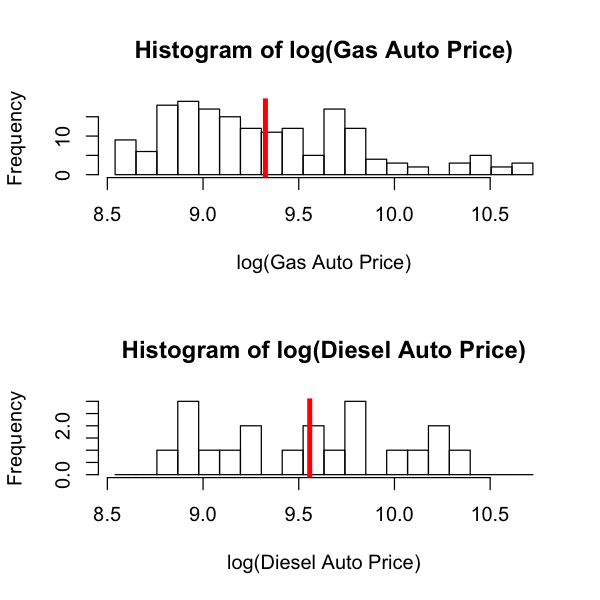

In [26]:
plot.t(autos.gas.log.prices, autos.diesel.log.prices, 
       cols = c('log(Gas Auto Price)', 'log(Diesel Auto Price)'))

t.test(autos.gas.log.prices, autos.diesel.log.prices, alternative = "two.sided")

* Histograms appear to have significant overlap, and means are fairly close to each other.
* There is not much difference in auto prices based on fuel type. 

#### Significance by aspiration

Secondly, significance of log price stratified by aspiration was tested below. 

In [36]:
# Significance test of log price stratified by aspiration 
autos.turbo <- auto.price[auto.price$aspiration == "turbo",] 
autos.std <- auto.price[auto.price$aspiration == "std",] 
autos.turbo.log.prices <- log(autos.turbo$price)
autos.std.log.prices <- log(autos.std$price)


	Welch Two Sample t-test

data:  autos.std.log.prices and autos.turbo.log.prices
t = -4.4723, df = 66.863, p-value = 3.075e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4901126 -0.1876238
sample estimates:
mean of x mean of y 
 9.287064  9.625932 


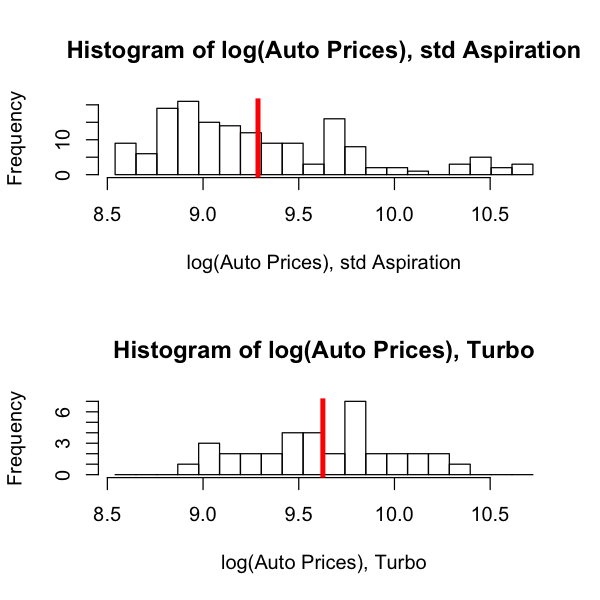

In [37]:
plot.t(autos.std.log.prices, autos.turbo.log.prices, 
       cols = c('log(Auto Prices), std Aspiration', 'log(Auto Prices), Turbo'))

t.test(autos.std.log.prices, autos.turbo.log.prices, alternative = "two.sided")

* There is a big gap between means.
* Since P-value is much less than zero, any observed price difference is not due to random sampling error.
* Both sides of the 95% confidence interval is on the same side of zero
* All the above suggests a turbo charger is usually going to have a significant impact on price.

#### Significance by drive train

Third, significance of log price stratified by front wheel vs rear wheel drive was tested below.

In [38]:
table(auto.price$drive.wheels)


4wd fwd rwd 
  8 116  71 

In [51]:
# Significance test of log price stratified by drive.wheels, rear vs. front wheel drive

autos.fwd <- auto.price[auto.price$drive.wheels == "fwd",]
autos.rwd <- auto.price[auto.price$drive.wheels == "rwd",]
autos.fwd.log.prices <- log(autos.fwd$price)
autos.rwd.log.prices <- log(autos.rwd$price)



	Welch Two Sample t-test

data:  autos.fwd.log.prices and autos.rwd.log.prices
t = -12.233, df = 115.43, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8571999 -0.6182849
sample estimates:
mean of x mean of y 
 9.076065  9.813807 


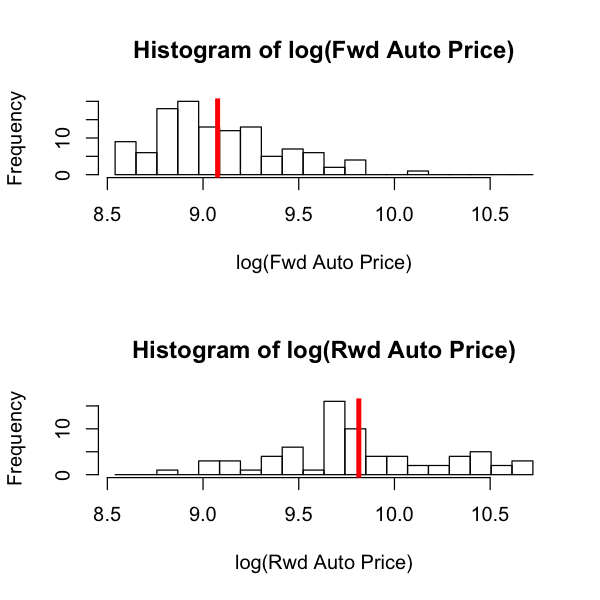

In [52]:
plot.t(autos.fwd.log.prices, autos.rwd.log.prices, 
       cols = c('log(Fwd Auto Price)', 'log(Rwd Auto Price)'))

t.test(autos.fwd.log.prices, autos.rwd.log.prices, alternative = "two.sided")


* There is a significant difference between means.
* Since P-value is much less than zero, any observed price difference is not due to random sampling error.
* Both sides of the 95% confidence interval is on the same side of zero
* All the above indicates that prices of front-wheel drive autos are higher than that of rear-wheel drive.

### 3. Apply ANOVA and Tukey's HSD test to the auto price data

In the last section, ANOVA test was applied to compare the log price of autos stratified by body style.

In [54]:
# Significance test of log price stratified by body.style
# First convert categorical data to numeric

auto.data$body.style[auto.data$body.style == "convertible"] <- "1"
auto.data$body.style[auto.data$body.style == "hardtop"] <- "2" 
auto.data$body.style[auto.data$body.style == "hatchback"] <- "3"
auto.data$body.style[auto.data$body.style == "sedan"] <- "4" 
auto.data$body.style[auto.data$body.style == "wagon"] <- "5" 
auto.data$body.style <- as.numeric(auto.data$body.style)

The code in the cell below models the anova of the log price by the body style and prints a summary of the model.

In [57]:
autos.body.style.aov <- aov(log(price) ~ auto.price$body.style, data = auto.price)
summary(autos.body.style.aov)

                       Df Sum Sq Mean Sq F value   Pr(>F)    
auto.price$body.style   4   7.85  1.9615   8.788 1.57e-06 ***
Residuals             190  42.41  0.2232                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

P-value indicates that there is a significant difference in prices of at least two different body styles.

In [58]:
print(autos.body.style.aov)

Call:
   aov(formula = log(price) ~ auto.price$body.style, data = auto.price)

Terms:
                auto.price$body.style Residuals
Sum of Squares                7.84591  42.41013
Deg. of Freedom                     4       190

Residual standard error: 0.4724523
Estimated effects may be unbalanced


The body style was converted to factor to perform further analysis. 

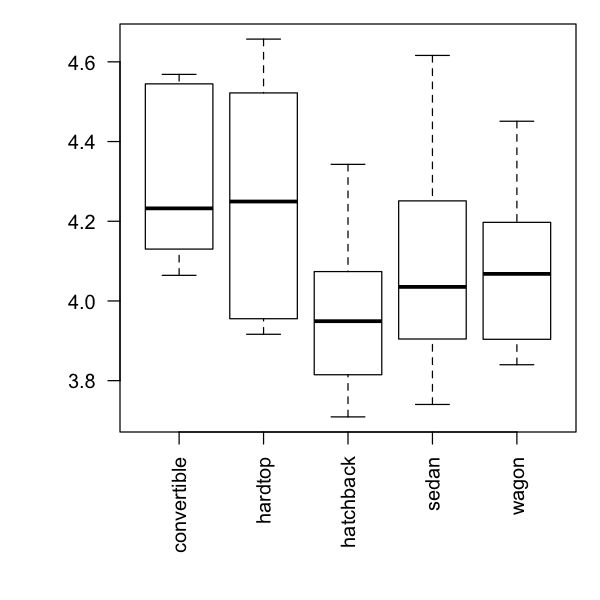

In [35]:
auto.data$body.style <- factor(auto.data$body.style) # Make sure your groups are a factor 
par(mar=c(7,5,1,1))
boxplot(log.price ~ auto.data$body.style, las = 2)

* Convertible and Hardtop appear very similar. 
* Sedan and Wagon appear very similar. 
* Hatchback seems to be the one that has the greatest difference. 

#### Tukey HSD for Price by Body style 

In [59]:
autos.body.style.hsd <- TukeyHSD(autos.body.style.aov)  # Tukey's Range test
autos.body.style.hsd

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log(price) ~ auto.price$body.style, data = auto.price)

$`auto.price$body.style`
                             diff         lwr         upr     p adj
hardtop-convertible   -0.09664988 -0.79938112  0.60608136 0.9955964
hatchback-convertible -0.78537118 -1.34130681 -0.22943556 0.0012903
sedan-convertible     -0.45193455 -0.99984087  0.09597177 0.1586910
wagon-convertible     -0.53101926 -1.12493556  0.06289704 0.1037126
hatchback-hardtop     -0.68872130 -1.17710344 -0.20033917 0.0013238
sedan-hardtop         -0.35528467 -0.83450698  0.12393764 0.2502185
wagon-hardtop         -0.43436938 -0.96558426  0.09684551 0.1654127
sedan-hatchback        0.33343663  0.12157052  0.54530274 0.0002276
wagon-hatchback        0.25435193 -0.05777382  0.56647767 0.1680903
wagon-sedan           -0.07908470 -0.37667401  0.21850460 0.9488191


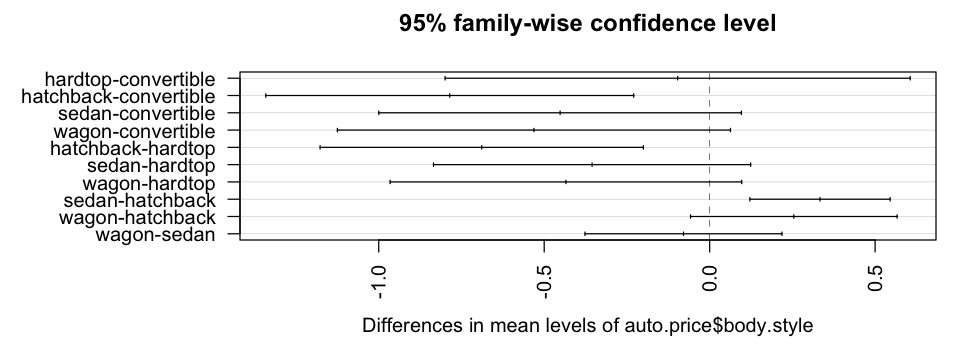

In [62]:
options(repr.plot.width=8, repr.plot.height=3)
par (las=2)
par(mar=c(5,10,3,1))
plot(autos.body.style.hsd)

Tukey HSD validates the information we got from ANOVA. 
* There's a singificant difference between Sedans and Hatchbacks.
* Wagan and Sedan has similar range of price. 
* Convertible and Hardtop has similar range of price. 